In [ ]:
import pickle
import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math



from functions.test_algorithms import *
from functions.random_search import * 
from slim_gsgp_lib.datasets.data_loader import *
import pickle
datasets = [globals()[i] for i in globals() if 'load' in i][2:]

### Just STRMUT

In [45]:
with open('best_params/best_slim_bike_sharing_100_100_True_just_strmut.pkl', 'rb') as f:
    best_params = pickle.load(f)

best_params['SLIM*SIG1']

{'p_inflate': 0.7,
 'max_depth': 21,
 'init_depth': 11,
 'prob_const': 0.1,
 'prob_replace': 0.01,
 'p_prune': 0.7,
 'p_xo': 0,
 'p_struct_xo': 0}

In [58]:
df_stats = pd.DataFrame(columns=["SLIM+SIG2", "SLIM*SIG2", "SLIM+ABS", "SLIM*ABS", "SLIM+SIG1", "SLIM*SIG1"], index=datasets)
for filename in os.listdir('results/SLIM'):
    # For each dataset
    if 'struct' in filename:
        name = filename.split('_struct')[0]
    
    else: 
        continue

    with open('best_params/best_slim_' + name + '_100_100_True_just_strmut.pkl', 'rb') as f:
        best_params = pickle.load(f)
        print(best_params['SLIM*SIG1']['max_depth'])

    with open('results/SLIM/' + name+'_just_strmut.pkl', 'rb') as f:
        results = pickle.load(f)
        print(np.array([np.mean(values) for keys, values in results['rmse_'].items()]))
        # print(np.min(results['rmse_']['SLIM*SIG1']))

18
[0.13866382 0.14643677 0.16892315 0.16475599 0.15610714 0.16790914]
21
[0.0456352  0.04178215 0.05359843 0.05081138 0.04657579 0.07162013]
19
[0.31190615 0.30340473 0.32999592 0.30671493 0.31913186 0.30565029]
13
[0.11937819 0.11679771 0.11578266 0.13284213 0.12329492 0.12751903]
19
[0.27784488 0.34599924 0.29680304 0.31068282 0.29588317 0.30224712]
17
[0.31947435 0.28595434 0.29427888 0.27996226 0.27978033 0.28472853]
22
[0.129122   0.14760813 0.15080726 0.13136699 0.12806507 0.14388572]
17
[0.18150956 0.18314389 0.1833655  0.1835057  0.1804966  0.18567166]
18
[0.09906113 0.11689343 0.10311535 0.10993295 0.09442578 0.11347277]
15
[0.09348141 0.10797128 0.09975424 0.10185066 0.08885127 0.12627645]
21
[0.20863485 0.20922161 0.20673876 0.21247162 0.20757278 0.20964068]
15
[0.08698175 0.08680269 0.08669729 0.08831895 0.08891633 0.08722489]
22
[0.26945699 0.30032837 0.25027476 0.25862685 0.24895087 0.25774144]
12
[0.20877217 0.2123024  0.21496876 0.21853574 0.21015175 0.21502325]
20
[0.

In [43]:
df_stats = pd.DataFrame(columns=["SLIM+SIG2", "SLIM*SIG2", "SLIM+ABS", "SLIM*ABS", "SLIM+SIG1", "SLIM*SIG1"], index=datasets)
for filename in os.listdir('results/SLIM'):
    # For each dataset
    if 'struct' in filename:
        name = filename.split('_struct')[0]
    
    else: 
        continue

    with open('results/SLIM/' + name+'_scaled.pkl', 'rb') as f:
        results = pickle.load(f)
        mean_rmse = np.array([np.mean(values) for keys, values in results['rmse_'].items()])
        std_rmse = np.array([np.std(values) for keys, values in results['rmse_'].items()])
        mean_size = np.array([np.mean(values) for keys, values in results['size'].items()])
        std_size = np.array([np.std(values) for keys, values in results['size'].items()])

    with open('results/SLIM/' + name+'_just_strmut.pkl', 'rb') as f:
        results = pickle.load(f)
        mean_rmse_struct = np.array([np.mean(values) for keys, values in results['rmse_'].items()])
        std_rmse_struct = np.array([np.std(values) for keys, values in results['rmse_'].items()])
        mean_size_struct = np.array([np.mean(values) for keys, values in results['size'].items()])
        std_size_struct = np.array([np.std(values) for keys, values in results['size'].items()])

    print("{:.3f}".format(100*mean_rmse.min()), "| {:.3f}".format(100*mean_rmse_struct.min()),"|{:.3f}".format(mean_rmse.min()/mean_rmse_struct.min()), "|{:.2f}".format(mean_size.min()), "|{:.2f}".format(mean_size_struct.min()), "|{:.3f}".format(mean_size.min()/mean_size_struct.min()))
    print("{:.3f}".format(100*std_rmse.min()), "| {:.3f}".format(100*std_rmse_struct.min()))
    # print(mean_size.min(), mean_size_struct.min())

13.792 | 13.866 |0.995 |63.53 |39.50 |1.608
1.068 | 0.984
6.372 | 4.178 |1.525 |53.07 |27.07 |1.961
1.655 | 0.886
30.451 | 30.340 |1.004 |77.00 |36.90 |2.087
1.785 | 1.422
12.906 | 11.578 |1.115 |99.53 |30.63 |3.249
2.079 | 1.673
27.636 | 27.784 |0.995 |95.17 |42.97 |2.215
2.839 | 2.113
27.716 | 27.978 |0.991 |99.30 |56.40 |1.761
3.640 | 3.765
12.646 | 12.807 |0.987 |123.67 |81.47 |1.518
1.266 | 0.946
18.014 | 18.050 |0.998 |100.70 |51.03 |1.973
0.985 | 0.832
9.919 | 9.443 |1.050 |136.20 |47.23 |2.884
0.964 | 0.795
9.253 | 8.885 |1.041 |71.27 |97.13 |0.734
0.828 | 0.957
20.727 | 20.674 |1.003 |41.37 |35.93 |1.151
1.687 | 1.557
8.671 | 8.670 |1.000 |63.77 |31.10 |2.050
0.986 | 1.053
25.221 | 24.895 |1.013 |31.73 |23.87 |1.330
3.635 | 3.823
20.825 | 20.877 |0.997 |94.57 |36.37 |2.600
0.270 | 0.255
30.466 | 29.730 |1.025 |29.67 |63.47 |0.467
3.277 | 2.668
7.041 | 5.478 |1.285 |38.70 |13.67 |2.832
2.515 | 1.998


In [75]:
best_params

{'SLIM+SIG2': {'p_inflate': 0.4,
  'max_depth': 22,
  'init_depth': 6,
  'prob_const': 0.1,
  'prob_replace': 0.015,
  'p_prune': 0.6,
  'p_xo': 0,
  'p_struct_xo': 0},
 'SLIM*SIG2': {'p_inflate': 0.1,
  'max_depth': 15,
  'init_depth': 9,
  'prob_const': 0.2,
  'prob_replace': 0.01,
  'p_prune': 0.2,
  'p_xo': 0,
  'p_struct_xo': 0},
 'SLIM+ABS': {'p_inflate': 0.3,
  'max_depth': 21,
  'init_depth': 12,
  'prob_const': 0.05,
  'prob_replace': 0.02,
  'p_prune': 0.7,
  'p_xo': 0,
  'p_struct_xo': 0},
 'SLIM*ABS': {'p_inflate': 0.1,
  'max_depth': 15,
  'init_depth': 9,
  'prob_const': 0.15,
  'prob_replace': 0.02,
  'p_prune': 0.3,
  'p_xo': 0,
  'p_struct_xo': 0},
 'SLIM+SIG1': {'p_inflate': 0.3,
  'max_depth': 20,
  'init_depth': 6,
  'prob_const': 0.2,
  'prob_replace': 0.015,
  'p_prune': 0.7,
  'p_xo': 0,
  'p_struct_xo': 0},
 'SLIM*SIG1': {'p_inflate': 0.1,
  'max_depth': 16,
  'init_depth': 6,
  'prob_const': 0.2,
  'prob_replace': 0.02,
  'p_prune': 0.3,
  'p_xo': 0,
  'p_struc

In [139]:
df_corr = pd.DataFrame()
df_corr_unstruct = pd.DataFrame()

for filename in os.listdir('results/SLIM'):
    # For each dataset
    if 'struct' in filename:
        name = filename.split('_struct')[0]
    
    else: 
        continue

    with open('best_params/best_slim_' + name + '_100_100_True_just_strmut.pkl', 'rb') as f:
        best_params = pickle.load(f)

    with open('best_params/best_slim_' + name + '_100_100_True.pkl', 'rb') as f:
        best_params_unstruct = pickle.load(f)

    with open('results/SLIM/' + name+'_scaled.pkl', 'rb') as f:
        results = pickle.load(f)
        mean_rmse = np.array([np.mean(values) for keys, values in results['rmse_'].items()])

    with open('results/SLIM/' + name+'_just_strmut.pkl', 'rb') as f:
        results = pickle.load(f)
        mean_rmse_struct = np.array([np.mean(values) for keys, values in results['rmse_'].items()])

    # # Check if there is a correlation between the best parameters and the ratio between the RMSE of the structured and unstructured models
    # ratio = mean_rmse[-1]/mean_rmse_struct[-1]
    # params = best_params['SLIM*SIG1']

    # # Create a new dataframe to concatenate with ratio and params
    # df_corr = pd.concat([df_corr, pd.DataFrame({'ratio': [ratio], **params})])

    for i, mean in enumerate(mean_rmse):
        ratio = mean_rmse[i] / mean_rmse_struct[i]
        
        # Select a key dynamically (e.g., using sorted keys)
        params_key = list(best_params.keys())[i % len(best_params)]  # Example cyclic selection
        params = best_params[params_key]
        
        # Create DataFrame for the current ratio and parameters
        new_row = pd.DataFrame({'ratio': [ratio], 'mean_rmse_struct' : [mean_rmse_struct[i]], **params})
        new_row_unstruct = pd.DataFrame({'mean_rmse': [mean], **best_params_unstruct[params_key]})
        
        # Concatenate with the main DataFrame
        df_corr = pd.concat([df_corr, new_row], ignore_index=True)
        df_corr_unstruct = pd.concat([df_corr_unstruct, new_row_unstruct], ignore_index=True)

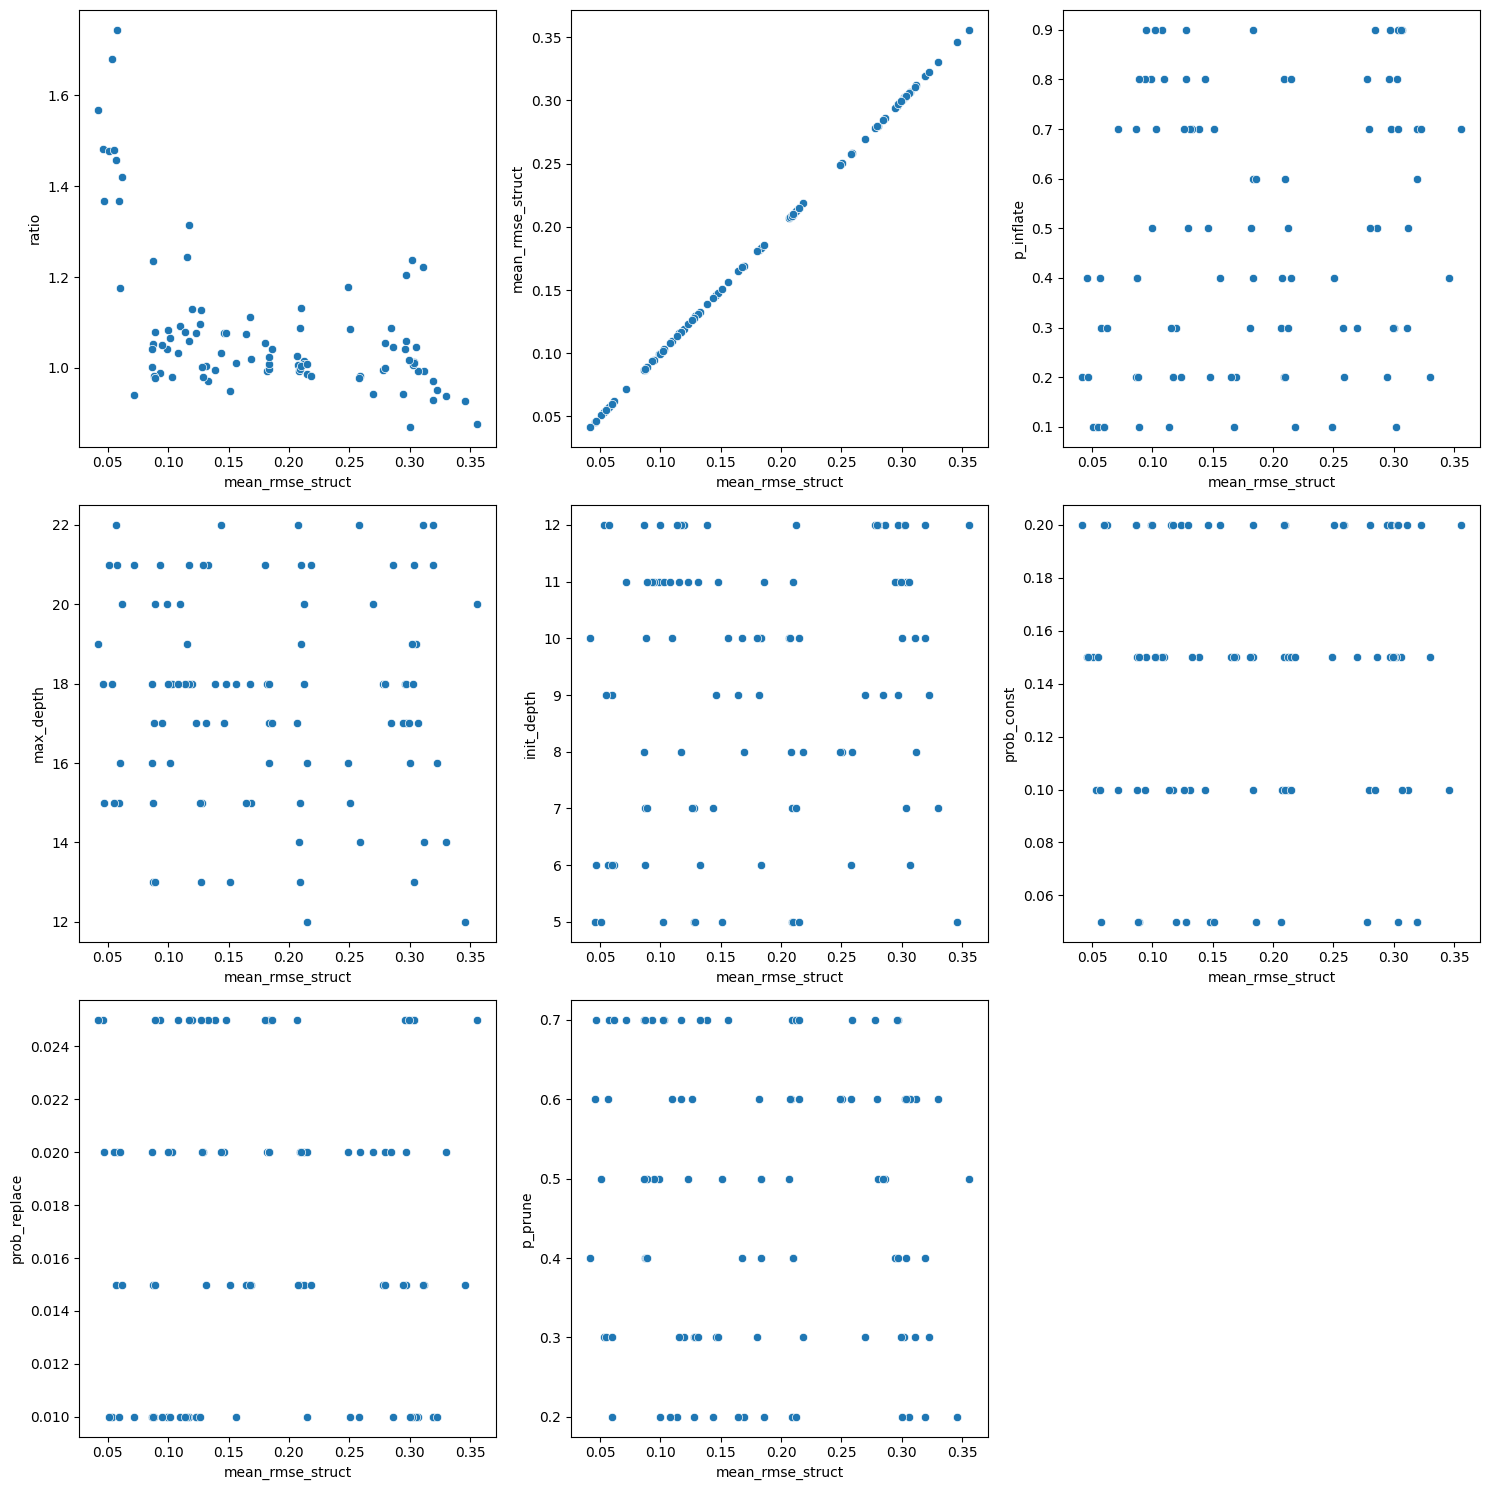

In [142]:
df_corr.drop('struct_mutation', axis=1, inplace=True, errors='ignore')
# Drop values that are constant 
df_corr = df_corr.loc[:, (df_corr != df_corr.iloc[0]).any()]

# Number of parameters (columns) in the DataFrame
n_columns = len(df_corr.columns)

# Determine grid size (rows and columns)
n_cols = 3  # You can choose a fixed number for columns
n_rows = math.ceil(n_columns / n_cols)  # Calculate required rows

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axs array to make indexing easier
axs = axs.flatten()

# Check for duplicate columns and rename if necessary
if df_corr.columns.duplicated().any():
    df_corr.columns = [f"col_{i}" for i in range(len(df_corr.columns))]

# Iterate and plot
for idx, column in enumerate(df_corr.columns):
    # sns.scatterplot(x='ratio', y=column, data=df_corr, ax=axs[idx])
    sns.scatterplot(x='mean_rmse_struct', y=column, data=df_corr, ax=axs[idx])

# Turn off any unused subplots
for idx in range(len(df_corr.columns), len(axs)):
    axs[idx].axis('off')

plt.tight_layout()
plt.show()

In [143]:
df_corr.corr().style.background_gradient(cmap='coolwarm')

,ratio,mean_rmse_struct,p_inflate,max_depth,init_depth,prob_const,prob_replace,p_prune
ratio,1.000000,-0.524121,-0.372490,0.127210,-0.026057,0.007715,-0.038158,0.023975
mean_rmse_struct,-0.524121,1.000000,0.204644,-0.033519,0.148439,0.045810,0.005473,-0.061713
p_inflate,-0.372490,0.204644,1.000000,0.043598,0.011832,-0.187335,0.112990,0.238022
max_depth,0.127210,-0.033519,0.043598,1.000000,0.346568,-0.029186,0.062408,0.026942
init_depth,-0.026057,0.148439,0.011832,0.346568,1.000000,-0.034742,0.046534,-0.163513
prob_const,0.007715,0.045810,-0.187335,-0.029186,-0.034742,1.000000,-0.040327,0.101238
prob_replace,-0.038158,0.005473,0.112990,0.062408,0.046534,-0.040327,1.000000,0.024828
p_prune,0.023975,-0.061713,0.238022,0.026942,-0.163513,0.101238,0.024828,1.000000


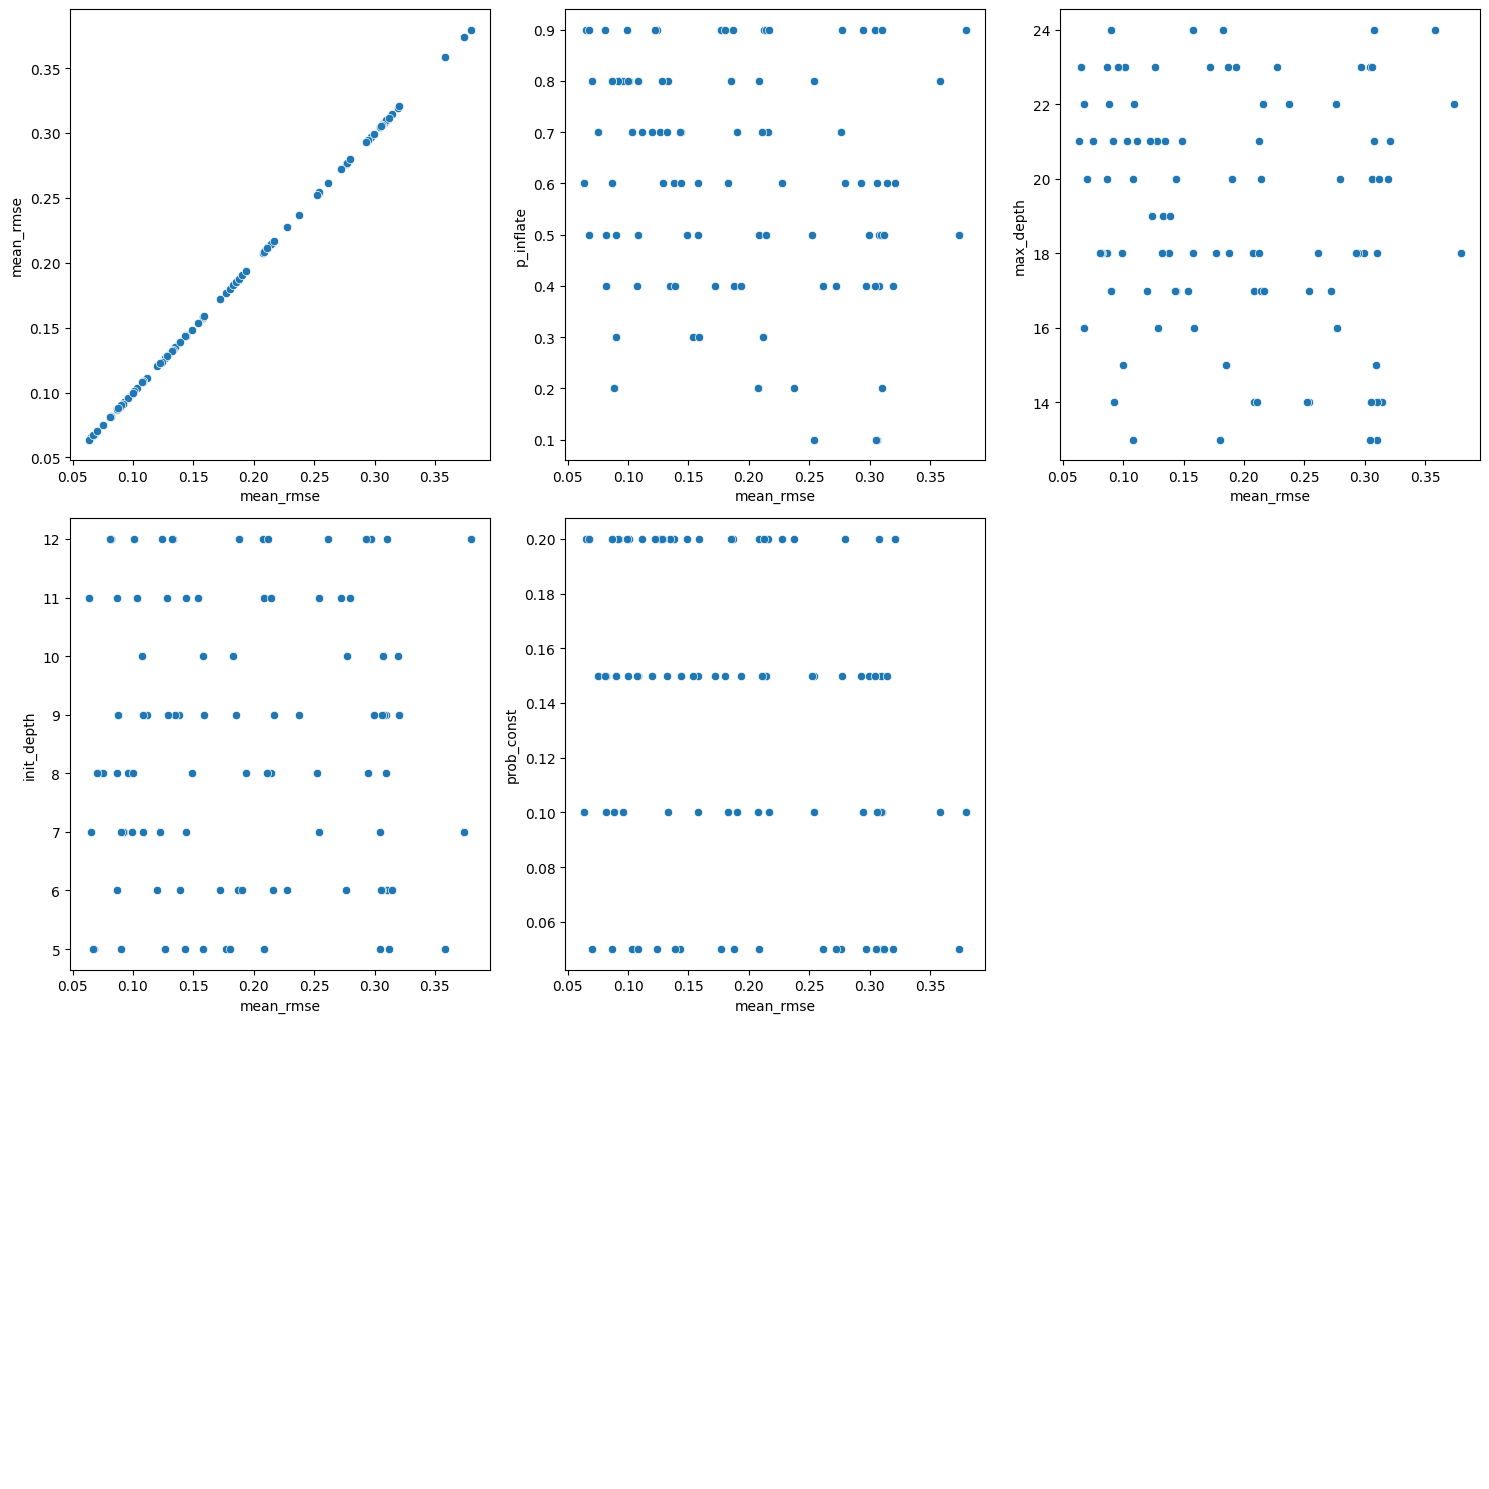

In [145]:
n_columns = len(df_corr_unstruct.columns)
df_corr_unstruct = df_corr_unstruct.loc[:, (df_corr_unstruct != df_corr_unstruct.iloc[0]).any()]
n_cols = 3
n_rows = math.ceil(n_columns / n_cols)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axs array to make indexing easier
axs = axs.flatten()

# Check for duplicate columns and rename if necessary
if df_corr_unstruct.columns.duplicated().any():
    df_corr_unstruct.columns = [f"col_{i}" for i in range(len(df_corr_unstruct.columns))]

# Iterate and plot
for idx, column in enumerate(df_corr_unstruct.columns):
    sns.scatterplot(x='mean_rmse', y=column, data=df_corr_unstruct, ax=axs[idx])

# Turn off any unused subplots
for idx in range(len(df_corr_unstruct.columns), len(axs)):
    axs[idx].axis('off')

plt.tight_layout()
plt.show()

In [146]:
# Correlation matrix
df_corr_unstruct.corr().style.background_gradient(cmap='coolwarm')

,mean_rmse,p_inflate,max_depth,init_depth,prob_const
mean_rmse,1.000000,-0.218420,-0.115419,0.002595,-0.286059
p_inflate,-0.218420,1.000000,-0.003333,-0.132088,0.170749
max_depth,-0.115419,-0.003333,1.000000,-0.035831,0.093294
init_depth,0.002595,-0.132088,-0.035831,1.000000,-0.053750
prob_const,-0.286059,0.170749,0.093294,-0.053750,1.000000


### XOGP

In [124]:
with open('best_params/best_slim_bike_sharing_100_100_True_just_strxo.pkl', 'rb') as f:
    best_params = pickle.load(f)

best_params['SLIM*SIG1']

{'p_inflate': 0.6,
 'max_depth': 15,
 'init_depth': 5,
 'prob_const': 0.2,
 'prob_replace': 0,
 'p_prune': 0,
 'p_xo': 0.8,
 'p_struct_xo': 1,
 'struct_mutation': False}

In [125]:
df_stats = pd.DataFrame(columns=["SLIM+SIG2", "SLIM*SIG2", "SLIM+ABS", "SLIM*ABS", "SLIM+SIG1", "SLIM*SIG1"], index=datasets)
for filename in os.listdir('results/SLIM'):
    # For each dataset
    if 'struct' in filename:
        name = filename.split('_struct')[0]
    
    else: 
        continue

    with open('results/SLIM/' + name+'_scaled.pkl', 'rb') as f:
        results = pickle.load(f)
        mean_rmse = np.array([np.mean(values) for keys, values in results['rmse_'].items()])
        std_rmse = np.array([np.std(values) for keys, values in results['rmse_'].items()])
        mean_size = np.array([np.mean(values) for keys, values in results['size'].items()])
        std_size = np.array([np.std(values) for keys, values in results['size'].items()])

    with open('results/SLIM/' + name+'_just_strxo.pkl', 'rb') as f:
        results = pickle.load(f)
        mean_rmse_struct = np.array([np.mean(values) for keys, values in results['rmse_'].items()])
        std_rmse_struct = np.array([np.std(values) for keys, values in results['rmse_'].items()])
        mean_size_struct = np.array([np.mean(values) for keys, values in results['size'].items()])
        std_size_struct = np.array([np.std(values) for keys, values in results['size'].items()])

    print("--------------------", name, "----------------------")
    print("{:.3f}".format(100*mean_rmse.min()), "| {:.3f}".format(100*mean_rmse_struct.min()),"| {:.3f}".format(mean_rmse.min()/mean_rmse_struct.min()), "|| {:.1f}".format(mean_size.min()), "| {:.1f}".format(mean_size_struct.min()), "| {:.3f}".format(mean_size.min()/mean_size_struct.min()))
    print("{:.3f}".format(100*std_rmse.min()), "| {:.3f}".format(100*std_rmse_struct.min()))
    # print(mean_size.min(), mean_size_struct.min())

-------------------- airfoil ----------------------
13.792 | 14.489 | 0.952 || 63.5 | 106.7 | 0.595
1.068 | 1.100
-------------------- bike_sharing ----------------------
6.372 | 4.436 | 1.436 || 53.1 | 33.4 | 1.590
1.655 | 1.832
-------------------- bioav ----------------------
30.451 | 30.383 | 1.002 || 77.0 | 63.1 | 1.221
1.785 | 1.703
-------------------- boston ----------------------
12.906 | 11.730 | 1.100 || 99.5 | 38.4 | 2.590
2.079 | 1.846
-------------------- breast_cancer ----------------------
27.636 | 30.605 | 0.903 || 95.2 | 71.1 | 1.338
2.839 | 1.726
-------------------- concrete_slump ----------------------
27.716 | 27.990 | 0.990 || 99.3 | 68.0 | 1.460
3.640 | 2.970
-------------------- concrete_strength ----------------------
12.646 | 12.559 | 1.007 || 123.7 | 140.9 | 0.878
1.266 | 0.763
-------------------- diabetes ----------------------
18.014 | 17.745 | 1.015 || 100.7 | 51.1 | 1.972
0.985 | 0.819
-------------------- efficiency_cooling ----------------------
9.919

In [126]:
# Lets check the correlation between the best parameters and the ratio between the RMSE of the structured and unstructured models
df_corr = pd.DataFrame()

for filename in os.listdir('results/SLIM'):
    # For each dataset
    if 'struct' in filename:
        name = filename.split('_struct')[0]
    
    else: 
        continue

    with open('best_params/best_slim_' + name + '_100_100_True_just_strxo.pkl', 'rb') as f:
        best_params = pickle.load(f)

    with open('results/SLIM/' + name+'_scaled.pkl', 'rb') as f:
        results = pickle.load(f)
        mean_rmse = np.array([np.mean(values) for keys, values in results['rmse_'].items()])

    with open('results/SLIM/' + name+'_just_strxo.pkl', 'rb') as f:
        results = pickle.load(f)
        mean_rmse_struct = np.array([np.mean(values) for keys, values in results['rmse_'].items()])

    for i, mean in enumerate(mean_rmse):
        ratio = mean_rmse[i] / mean_rmse_struct[i]
        
        # Select a key dynamically (e.g., using sorted keys)
        params_key = list(best_params.keys())[i % len(best_params)]  # Example cyclic selection
        params = best_params[params_key]
        
        # Create DataFrame for the current ratio and parameters
        new_row = pd.DataFrame({'ratio': [ratio], **params})
        
        # Concatenate with the main DataFrame
        df_corr = pd.concat([df_corr, new_row], ignore_index=True)

df_corr.drop('struct_crossover', axis=1, inplace=True, errors='ignore')
# Drop values that are constant
df_corr = df_corr.loc[:, (df_corr != df_corr.iloc[0]).any()]

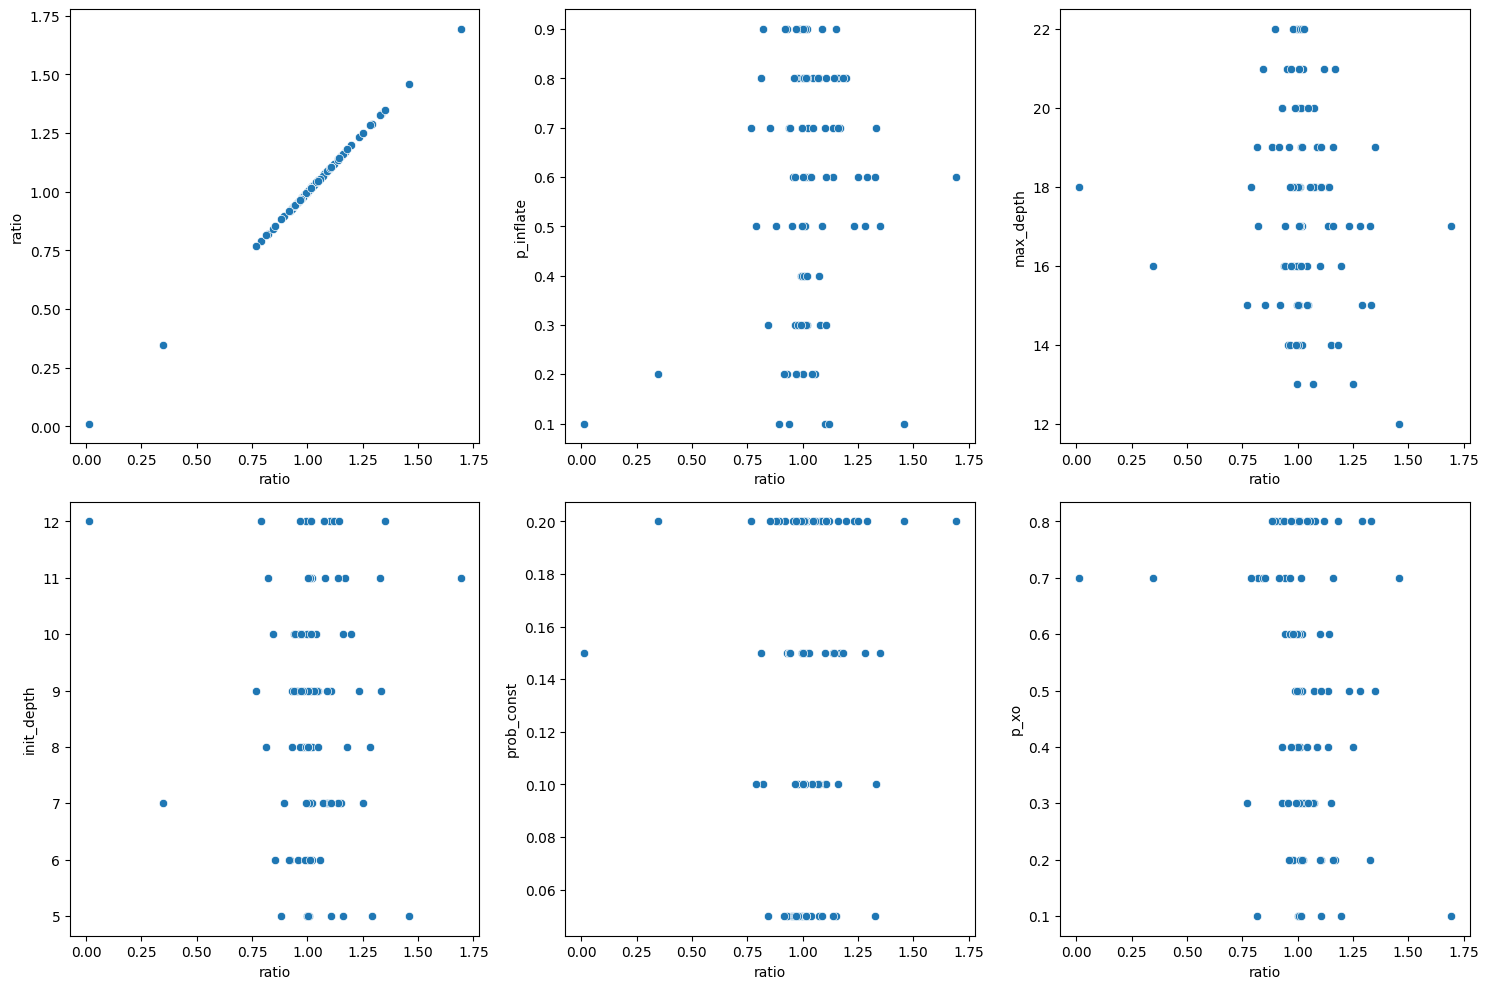

In [127]:
n_columns = len(df_corr.columns)

n_cols = 3 
n_rows = math.ceil(n_columns / n_cols)

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axs array to make indexing easier
axs = axs.flatten()

# Check for duplicate columns and rename if necessary
if df_corr.columns.duplicated().any():
    df_corr.columns = [f"col_{i}" for i in range(len(df_corr.columns))]

# Iterate and plot
for idx, column in enumerate(df_corr.columns):
    sns.scatterplot(x='ratio', y=column, data=df_corr, ax=axs[idx])

# Turn off any unused subplots
for idx in range(len(df_corr.columns), len(axs)):
    axs[idx].axis('off')

plt.tight_layout()
plt.show()

In [128]:
df_corr.corr().style.background_gradient(cmap='coolwarm')

,ratio,p_inflate,max_depth,init_depth,prob_const,p_xo
ratio,1.000000,0.158520,-0.119864,-0.022566,0.032237,-0.178284
p_inflate,0.158520,1.000000,-0.005033,-0.052629,-0.148620,-0.262985
max_depth,-0.119864,-0.005033,1.000000,0.136441,-0.157480,-0.109738
init_depth,-0.022566,-0.052629,0.136441,1.000000,-0.268176,-0.027408
prob_const,0.032237,-0.148620,-0.157480,-0.268176,1.000000,0.158020
p_xo,-0.178284,-0.262985,-0.109738,-0.027408,0.158020,1.000000


### STRMUT + XOMUT + XOGP

In [103]:
datasets = []
for filename in os.listdir('results/SLIM'):
    if 'struct' in filename:
        datasets.append(filename.split('_struct')[0])

In [ ]:
with open('best_params/best_slim_airfoil_100_100_True.pkl', 'rb') as f:
    best_params = pickle.load(f)

best_params

In [ ]:
with open('best_params/best_slim_bike_sharing_100_100_True_struct.pkl', 'rb') as f:
    best_params = pickle.load(f)

best_params

In [175]:
df_stats = pd.DataFrame(columns=["SLIM+SIG2", "SLIM*SIG2", "SLIM+ABS", "SLIM*ABS", "SLIM+SIG1", "SLIM*SIG1"], index=datasets)
for filename in os.listdir('results/SLIM'):
    # For each dataset
    if 'struct' in filename:
        name = filename.split('_struct')[0]
    
    else: 
        continue

    with open('results/SLIM/' + name+'_scaled.pkl', 'rb') as f:
        results = pickle.load(f)
        mean_rmse = np.array([np.mean(values) for keys, values in results['rmse_'].items()])
        std_rmse = np.array([np.std(values) for keys, values in results['rmse_'].items()])
        mean_size = np.array([np.mean(values) for keys, values in results['size'].items()])
        std_size = np.array([np.std(values) for keys, values in results['size'].items()])

    with open('results/SLIM/' + name+'_struct.pkl', 'rb') as f:
        results = pickle.load(f)
        mean_rmse_struct = np.array([np.mean(values) for keys, values in results['rmse_'].items()])
        std_rmse_struct = np.array([np.std(values) for keys, values in results['rmse_'].items()])
        mean_size_struct = np.array([np.mean(values) for keys, values in results['size'].items()])
        std_size_struct = np.array([np.std(values) for keys, values in results['size'].items()])

    print("{:.2f}".format(100*mean_rmse.min()), "{:.2f}".format(100*mean_rmse_struct.min()), "{:.2f}".format(results_corr[name]), "{:.2f}".format(mean_rmse.min()/mean_rmse_struct.min()))
    # print(mean_size.min(), mean_size_struct.min())

13.79 14.83 12.08 0.93
6.37 3.67 0.42 1.74
30.45 30.84 26.66 0.99
12.91 11.72 8.52 1.10
27.64 27.58 15.46 1.00
27.72 28.31 22.98 0.98
12.65 12.85 10.45 0.98
18.01 17.82 16.71 1.01
9.92 9.21 8.94 1.08
9.25 8.79 8.46 1.05
20.73 20.81 18.47 1.00
8.67 8.51 7.18 1.02
25.22 24.79 20.86 1.02
20.82 20.84 20.62 1.00
30.47 30.58 25.92 1.00
7.04 5.40 3.08 1.30


In [165]:
args = {'p_inflate': 0.3,
  'max_depth': 21,
  'init_depth': 10,
  'prob_const': 0.1,
  'prob_replace': 0.01,
  'p_prune': 0.6,
  'p_xo': 0.2,
  'p_struct_xo': 0.7}

results = {}
for dataset in [globals()[i] for i in globals() if 'load' in i][2:]:
  X, y = dataset()
  rm, ma, nrmse, r2, mae, std_rmse, time, train, test, size = test_slim(
              X=X, y=y, args_dict=args, dataset_name='test',
              ms_lower=0, ms_upper=1, n_elites=1,
              iterations=15, scale=True, algorithm='SLIM*SIG1',
              verbose=0, p_train=0.7, show_progress=True,
          )
  rm = np.array(rm)
  rm_min = 100*rm.min()
  results[dataset.__name__] = rm_min
  print(dataset.__name__, rm_min)

  0%|          | 0/15 [00:00<?, ?it/s]

100%|██████████| 15/15 [01:26<00:00,  5.76s/it]


load_resid_build_sale_price 3.077119402587414


100%|██████████| 15/15 [01:39<00:00,  6.61s/it]


load_istanbul 7.180445641279221


100%|██████████| 15/15 [01:43<00:00,  6.92s/it]


load_airfoil 12.081281840801239


100%|██████████| 15/15 [01:41<00:00,  6.77s/it]


load_bike_sharing 0.4183435346931219


100%|██████████| 15/15 [01:22<00:00,  5.52s/it]


load_boston 8.515595644712448


100%|██████████| 15/15 [01:31<00:00,  6.09s/it]


load_breast_cancer 15.458212792873383


100%|██████████| 15/15 [01:32<00:00,  6.19s/it]


load_concrete_slump 22.982238233089447


100%|██████████| 15/15 [01:29<00:00,  5.96s/it]


load_concrete_strength 10.452596098184586


100%|██████████| 15/15 [01:26<00:00,  5.76s/it]


load_diabetes 16.705723106861115


100%|██████████| 15/15 [01:25<00:00,  5.67s/it]


load_efficiency_heating 8.461150527000427


100%|██████████| 15/15 [01:20<00:00,  5.36s/it]


load_efficiency_cooling 8.938560634851456


100%|██████████| 15/15 [01:29<00:00,  5.99s/it]


load_forest_fires 18.470481038093567


100%|██████████| 15/15 [01:45<00:00,  7.03s/it]


load_parkinson_updrs 20.621614158153534


100%|██████████| 15/15 [01:37<00:00,  6.47s/it]


load_ld50 20.862020552158356


100%|██████████| 15/15 [01:37<00:00,  6.48s/it]


load_ppb 25.922706723213196


100%|██████████| 15/15 [01:28<00:00,  5.92s/it]

load_bioav 26.655355095863342


In [146]:
df_stats = pd.DataFrame(columns=["SLIM+SIG2", "SLIM*SIG2", "SLIM+ABS", "SLIM*ABS", "SLIM+SIG1", "SLIM*SIG1"], index=datasets)
for filename in os.listdir('results/SLIM'):
    # For each dataset
    if 'struct' in filename:
        name = filename.split('_struct')[0]
    
    else: 
        continue

    with open('results/SLIM/' + name+'_scaled.pkl', 'rb') as f:
        results_scaled = pickle.load(f)
        test = np.array([np.mean(values) for keys, values in results_scaled['test_fit'].items()])
        train = np.array([np.std(values) for keys, values in results_scaled['train_fit'].items()])
        mean_size = np.array([np.mean(values) for keys, values in results_scaled['size'].items()])
        std_size = np.array([np.std(values) for keys, values in results_scaled['size'].items()])

    with open('results/SLIM/' + name+'_struct.pkl', 'rb') as f:
        results_struct = pickle.load(f)
        test_struct = np.array([np.mean(values) for keys, values in results_struct['test_fit'].items()])
        train_struct = np.array([np.std(values) for keys, values in results_struct['train_fit'].items()])
        mean_size_struct = np.array([np.mean(values) for keys, values in results_struct['size'].items()])
        std_size_struct = np.array([np.std(values) for keys, values in results_struct['size'].items()])

    print('-------------------', name, '-------------------')
    print(test)
    print(test_struct)

------------------- airfoil -------------------
[0.13792237 0.15762735 0.1722157  0.17693558 0.15780798 0.18667119]
[0.14832592 0.16048525 0.15802479 0.16546231 0.15924304 0.19580386]
------------------- bike_sharing -------------------
[0.06761615 0.06552969 0.09000596 0.07510583 0.06371854 0.06733989]
[0.04622429 0.03694668 0.05149901 0.05052477 0.04751019 0.0367056 ]
------------------- bioav -------------------
[0.30995024 0.30741564 0.30952701 0.30450562 0.31006524 0.31943202]
[0.31002265 0.32277876 0.30894084 0.30837021 0.31092197 0.32239372]
------------------- boston -------------------
[0.13493074 0.15354635 0.14400342 0.12906207 0.13281019 0.14386057]
[0.11720274 0.11842243 0.12011071 0.12288083 0.12176637 0.11751374]
------------------- breast_cancer -------------------
[0.27636146 0.32066432 0.31444111 0.3796575  0.30796053 0.37382745]
[0.3083076  0.31549337 0.29649097 0.27580727 0.29800231 0.31951562]
------------------- concrete_slump -------------------
[0.29715798 0.299

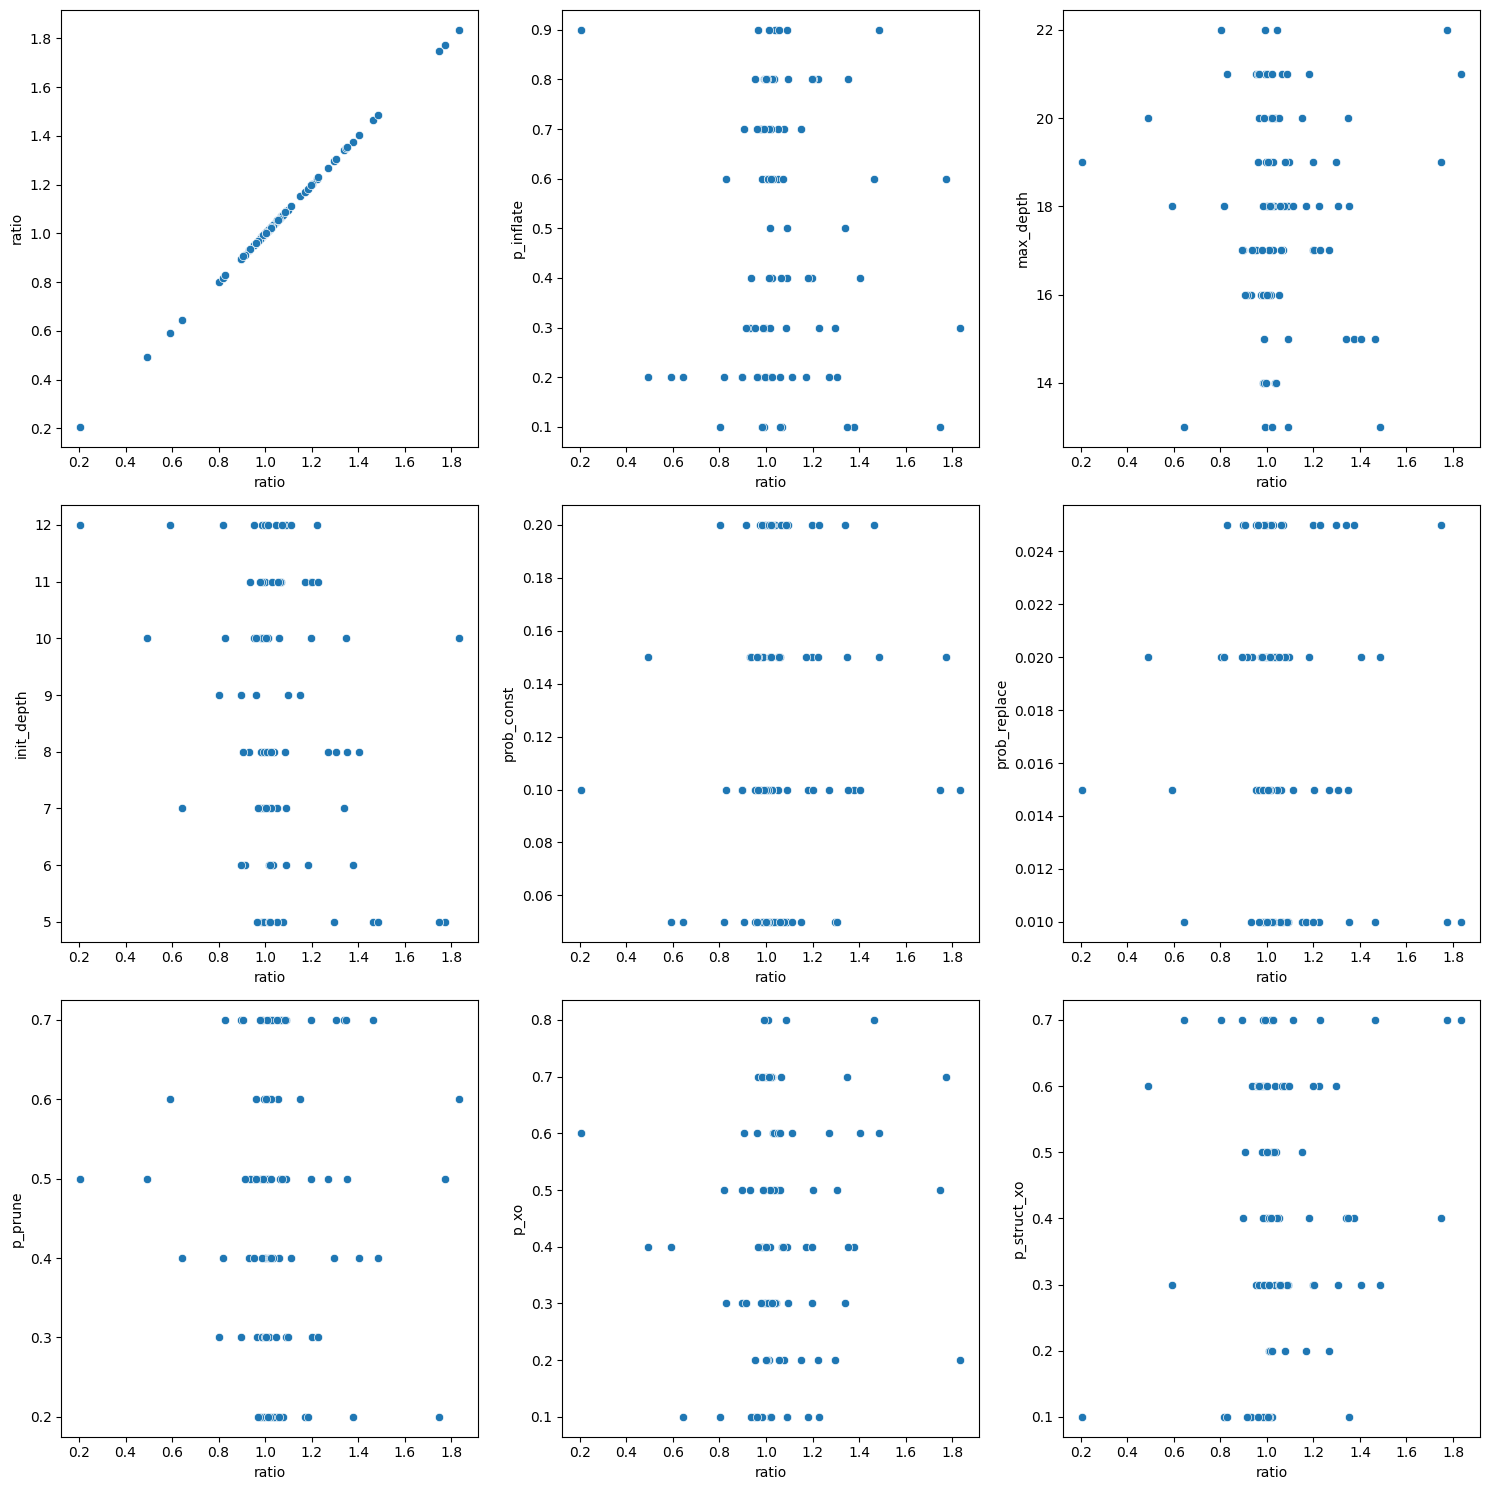

In [130]:
# Lets check the correlation between the best parameters and the ratio between the RMSE of the structured and unstructured models
df_corr = pd.DataFrame()

for filename in os.listdir('results/SLIM'):
    # For each dataset
    if 'struct' in filename:
        name = filename.split('_struct')[0]
    
    else: 
        continue

    with open('best_params/best_slim_' + name + '_100_100_True_struct.pkl', 'rb') as f:
        best_params = pickle.load(f)

    with open('results/SLIM/' + name+'_scaled.pkl', 'rb') as f:
        results = pickle.load(f)
        test = np.array([np.mean(values) for keys, values in results['test_fit'].items()])

    with open('results/SLIM/' + name+'_struct.pkl', 'rb') as f:
        results = pickle.load(f)
        test_struct = np.array([np.mean(values) for keys, values in results['test_fit'].items()])

    for i, mean in enumerate(test):
        ratio = test[i] / test_struct[i]
        
        # Select a key dynamically (e.g., using sorted keys)
        params_key = list(best_params.keys())[i % len(best_params)]  # Example cyclic selection
        params = best_params[params_key]
        
        # Create DataFrame for the current ratio and parameters
        new_row = pd.DataFrame({'ratio': [ratio], **params})
        
        # Concatenate with the main DataFrame
        df_corr = pd.concat([df_corr, new_row], ignore_index=True)

df_corr.drop('struct_mutation', axis=1, inplace=True, errors='ignore')
# Drop values that are constant
df_corr = df_corr.loc[:, (df_corr != df_corr.iloc[0]).any()]

n_columns = len(df_corr.columns)

n_cols = 3
n_rows = math.ceil(n_columns / n_cols)

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axs array to make indexing easier
axs = axs.flatten()

# Check for duplicate columns and rename if necessary
if df_corr.columns.duplicated().any():
    df_corr.columns = [f"col_{i}" for i in range(len(df_corr.columns))]

# Iterate and plot
for idx, column in enumerate(df_corr.columns):
    sns.scatterplot(x='ratio', y=column, data=df_corr, ax=axs[idx])

# Turn off any unused subplots
for idx in range(len(df_corr.columns), len(axs)):
    axs[idx].axis('off')

plt.tight_layout()
plt.show()

In [131]:
df_corr.corr().style.background_gradient(cmap='coolwarm')

,ratio,p_inflate,max_depth,init_depth,prob_const,prob_replace,p_prune,p_xo,p_struct_xo
ratio,1.000000,-0.032529,0.008724,-0.253122,0.062120,-0.067371,-0.023090,0.089463,0.135012
p_inflate,-0.032529,1.000000,0.090026,0.060808,-0.026581,-0.295163,-0.058949,-0.055768,-0.013379
max_depth,0.008724,0.090026,1.000000,0.226186,-0.029635,-0.163739,0.044097,-0.029624,0.115432
init_depth,-0.253122,0.060808,0.226186,1.000000,-0.022657,-0.135091,0.123701,-0.080224,0.060819
prob_const,0.062120,-0.026581,-0.029635,-0.022657,1.000000,-0.007701,-0.023119,-0.015237,0.161251
prob_replace,-0.067371,-0.295163,-0.163739,-0.135091,-0.007701,1.000000,-0.148666,-0.170906,-0.149838
p_prune,-0.023090,-0.058949,0.044097,0.123701,-0.023119,-0.148666,1.000000,0.222504,0.053642
p_xo,0.089463,-0.055768,-0.029624,-0.080224,-0.015237,-0.170906,0.222504,1.000000,-0.077357
p_struct_xo,0.135012,-0.013379,0.115432,0.060819,0.161251,-0.149838,0.053642,-0.077357,1.000000


### Scaled

In [ ]:
mean_rmsescaled_all = []

for filename in os.listdir('results/SLIM'):
    # For each dataset
    if 'struct' in filename:
        name = filename.split('_struct')[0]
    
    else: 
        continue

    with open('results/SLIM/' + name+'_scaled.pkl', 'rb') as f:
        results = pickle.load(f)
        mean_rmse_scaled = np.array([np.mean(values) for keys, values in results['rmse_'].items()])
        std_rmse_scaled = np.array([np.std(values) for keys, values in results['rmse_'].items()])
        mean_size_scaled = np.array([np.mean(values) for keys, values in results['size'].items()])
        std_size_scaled = np.array([np.std(values) for keys, values in results['size'].items()])

    with open('results/SLIM/' + name+'_unscaled.pkl', 'rb') as f:
        results = pickle.load(f)
        mean_rmse_unscaled = np.array([np.mean(values) for keys, values in results['rmse_'].items()])
        std_rmse_unscaled = np.array([np.std(values) for keys, values in results['rmse_'].items()])
        mean_size_unscaled = np.array([np.mean(values) for keys, values in results['size'].items()])
        std_size_unscaled = np.array([np.std(values) for keys, values in results['size'].items()])

    print(mean_rmse_unscaled - mean_rmse_scaled)

[5.774736  3.339687  6.416489  3.4611561 6.7725782 3.6953611]
[ 0.19473436 -0.135112    0.00161502 -0.15538374  0.21042344 -0.17053461]
[0.5786725  0.3300202  0.58180726 1.1073037  0.5742482  0.13710916]
[ 0.28297538 -0.11620569  0.23852581 -0.0408622   0.3007776  -0.10044187]
[-0.02940136 -0.00075221  0.02381086 -0.10231876 -0.03847641 -0.11358792]
[0.1317721  0.0736379  0.17520446 0.03853512 0.12223953 0.1004498 ]
[0.7285337  0.09196973 0.6079456  0.33276266 0.5302175  0.2063902 ]
[1.2561388  0.27933943 1.204401   0.80767006 1.2289534  0.08553594]
[ 0.37881857 -0.0274969   0.34271827 -0.07985708  0.3543714  -0.09261289]
[ 0.2949314  -0.04556927  0.22712174 -0.06440011  0.23955414 -0.11316216]
[ 0.98276925 -0.09167612  1.1261617  -0.04175651 -0.00819385 -0.14708078]
[-0.0787068   0.00189382 -0.01919091 -0.0042882   0.08407182 -0.188483  ]
[ 0.05149114 -0.05724537 -0.01549685  0.03524458 -0.06683481 -0.00045562]
[0.21347213 0.06166118 0.13586253 0.00580317 0.19740999 0.01181853]
[ 0.29

In [51]:
with open('results/SLIM/airfoil_scaled.pkl', 'rb') as f:
    results = pickle.load(f)
    mean_nrmse_ = [np.mean(values) for keys, values in results['nrmse_'].items()]
    std_nrmse_ = [np.std(values) for keys, values in results['nrmse_'].items()]
    mean_size = [np.mean(values) for keys, values in results['size'].items()]
    std_size = [np.std(values) for keys, values in results['size'].items()]